image shape : (288, 139, 130)


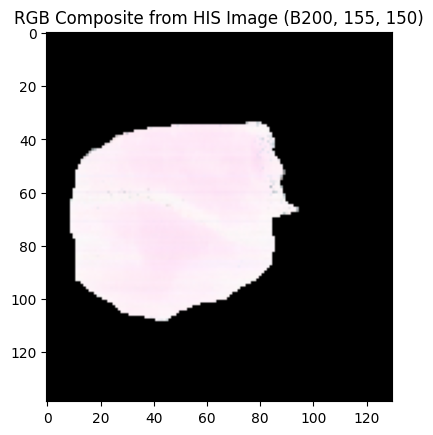

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

image_path = r"C:\Users\user\Desktop\HIS_example\Anti-1-2.tif"

with rasterio.open(image_path) as dataset:
    hyperspectral_data = dataset.read()
    
print(f"image shape : {hyperspectral_data.shape}")

red_band = hyperspectral_data[199, :, :]
green_band = hyperspectral_data[154, :, :]
blue_band = hyperspectral_data[149, :, :]

rgb_composite = np.dstack((red_band, green_band, blue_band))

rgb_composite_normalized = rgb_composite / np.max(rgb_composite)

plt.imshow(rgb_composite_normalized)
plt.title('RGB Composite from HIS Image (B200, 155, 150)')
plt.show()

Exception in thread Thread-3 (task):
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\user\Heojihye_Remotesensing\RS_Class_2025\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_12268\2317284900.py", line 21, in task
NameError: name 'image_path' is not defined


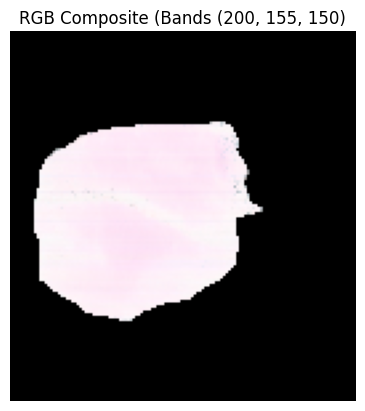

In [1]:
import tkinter as tk
from tkinter import filedialog
import threading
from tkinter import ttk
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def browse_file():
    global image_path
    image_path = filedialog.askopenfilename(title = "Select a hyperspectrl Image")
    progress['value'] = 0
    progress_label.config(text = "File Selected")
    
def plot_rgb():
    def task():
        r_band = int(r_entry.get())
        g_band = int(g_entry.get())
        b_band = int(b_entry.get())
        
        with rasterio.open(image_path) as dataset:
            data = dataset.read()
            
        red = data[r_band-1, :, :]
        green = data[g_band-1, :, :]
        blue = data[b_band-1, :, :]
        
        rgb = np.dstack((red, green, blue))
        rgb_norm = rgb / np.max(rgb)
        
        plt.imshow(rgb_norm)
        plt.title(f'RGB Composite (Bands ({r_band}, {g_band}, {b_band})')
        plt.axis('off')
        plt.show()
        
        progress['value'] = 100
        progress_label.config(text = "Display Complete")
        
    threading.Thread(target=task).start()

root = tk.Tk()
root.title("Hyperspectral RGB Viewer")
root.geometry("500x350")

browse_button = tk.Button(root, text="Browse Hyperspectral Image", command=browse_file)
browse_button.pack(pady=10)

r_entry = tk.Entry(root)
r_entry.pack(pady=5)
r_entry.insert(0, "200")

g_entry = tk.Entry(root)
g_entry.pack(pady=5)
g_entry.insert(0, "155")

b_entry = tk.Entry(root)
b_entry.pack(pady=5)
b_entry.insert(0, "150")

plot_button = tk.Button(root, text="Plot RGB Composite", command=plot_rgb)
plot_button.pack(pady=10)

progress = ttk.Progressbar(root, orient="horizontal", length=300, mode="determinate")
progress.pack(pady=10)

progress_label = tk.Label(root, text="Progress")
progress_label.pack()

root.mainloop()
            

C:\Users\user\AppData\Local\Temp\ipykernel_12268\1866769592.py:13: RuntimeWarning: invalid value encountered in divide
  Math = (Band217 - Band213) / (Band217 + Band213)


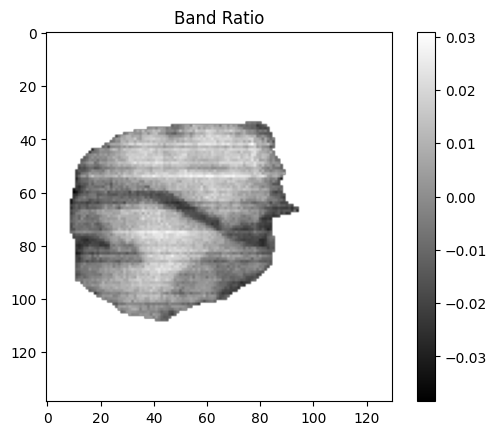

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

image_path = r"C:\Users\user\Desktop\HIS_example\Anti-1-2.tif"

with rasterio.open(image_path) as dataset:
    hyperspectral_data = dataset.read()
    
Band217 = hyperspectral_data[216, :, :]
Band213 = hyperspectral_data[212, :, :]

Math = (Band217 - Band213) / (Band217 + Band213)

plt.imshow(Math, cmap='gray')
plt.colorbar()
plt.title('Band Ratio')
plt.show()

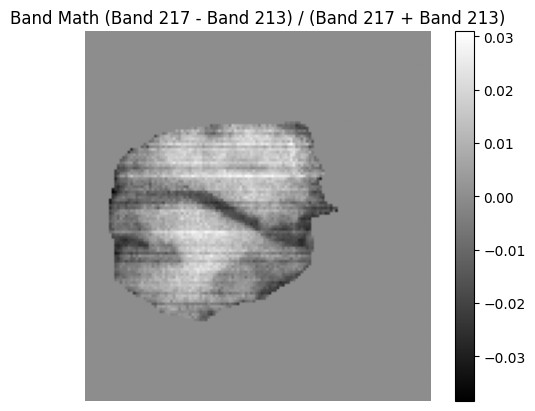

In [3]:
import tkinter as tk
from tkinter import filedialog
import threading
from tkinter import ttk
import rasterio
import numpy as np
import matplotlib.pyplot as plt


def browse_file():
    global image_path
    image_path = filedialog.askopenfilename(title="Select Hyperspectral File")
    progress['value'] = 0
    progress_label.config(text="File Selected")
    
def calculate_band_math():
    def task():
        band1_number = int(band1_entry.get())
        band2_number = int(band2_entry.get())
        
        with rasterio.open(image_path) as dataset:
            data = dataset.read()
            
        band1 = data[band1_number-1, :, :]
        band2 = data[band2_number-1, :, :]
        
        math_result= (band1 - band2) / (band1 + band2 + 1e-6)
        
        plt.imshow(math_result, cmap='gray')
        plt.colorbar()
        plt.title(f'Band Math (Band {band1_number} - Band {band2_number}) / (Band {band1_number} + Band {band2_number})')
        plt.axis('off')
        plt.show()
        
        progress['value'] = 100
        progress_label.config(text="Calculation Complete")
        
    threading.Thread(target=task).start()
    
root = tk.Tk()
root.title("Hyperspectral Band Math Calculator")
root.geometry("500x350")
    
browse_button = tk.Button(root, text="Browse Hyperspectral File", command=browse_file)
browse_button.pack(pady=10)
    
band1_label = tk.Label(root, text="Enter Band 1 Number:")
band1_label.pack()
band1_entry = tk.Entry(root)
band1_entry.pack(pady=5)
band1_entry.insert(0, "217")
    
band2_label = tk.Label(root, text="Enter Band 2 Number:")
band2_label.pack()
band2_entry = tk.Entry(root)
band2_entry.pack(pady=5)
band2_entry.insert(0, "213")
    
calc_button = tk.Button(root, text="Calculate Band Math", command=calculate_band_math)
calc_button.pack(pady=10)
    
progress = ttk.Progressbar(root, orient="horizontal", length=300, mode="determinate")
progress.pack(pady=10)
    
progress_label = tk.Label(root, text="Progress")
progress_label.pack()
    
root.mainloop()
    
    
    
    
    